In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn
import scipy


from pylab import rcParams
rcParams['figure.figsize'] = 16,12      # its for graph size wight, height
RANDOM_SEED = 101
LABELS = ['Normal', 'Fraud']

In [3]:
cards_data = pd.read_csv('creditcard.csv', sep=',')
cards_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
cards_data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
cards_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
cards_data['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

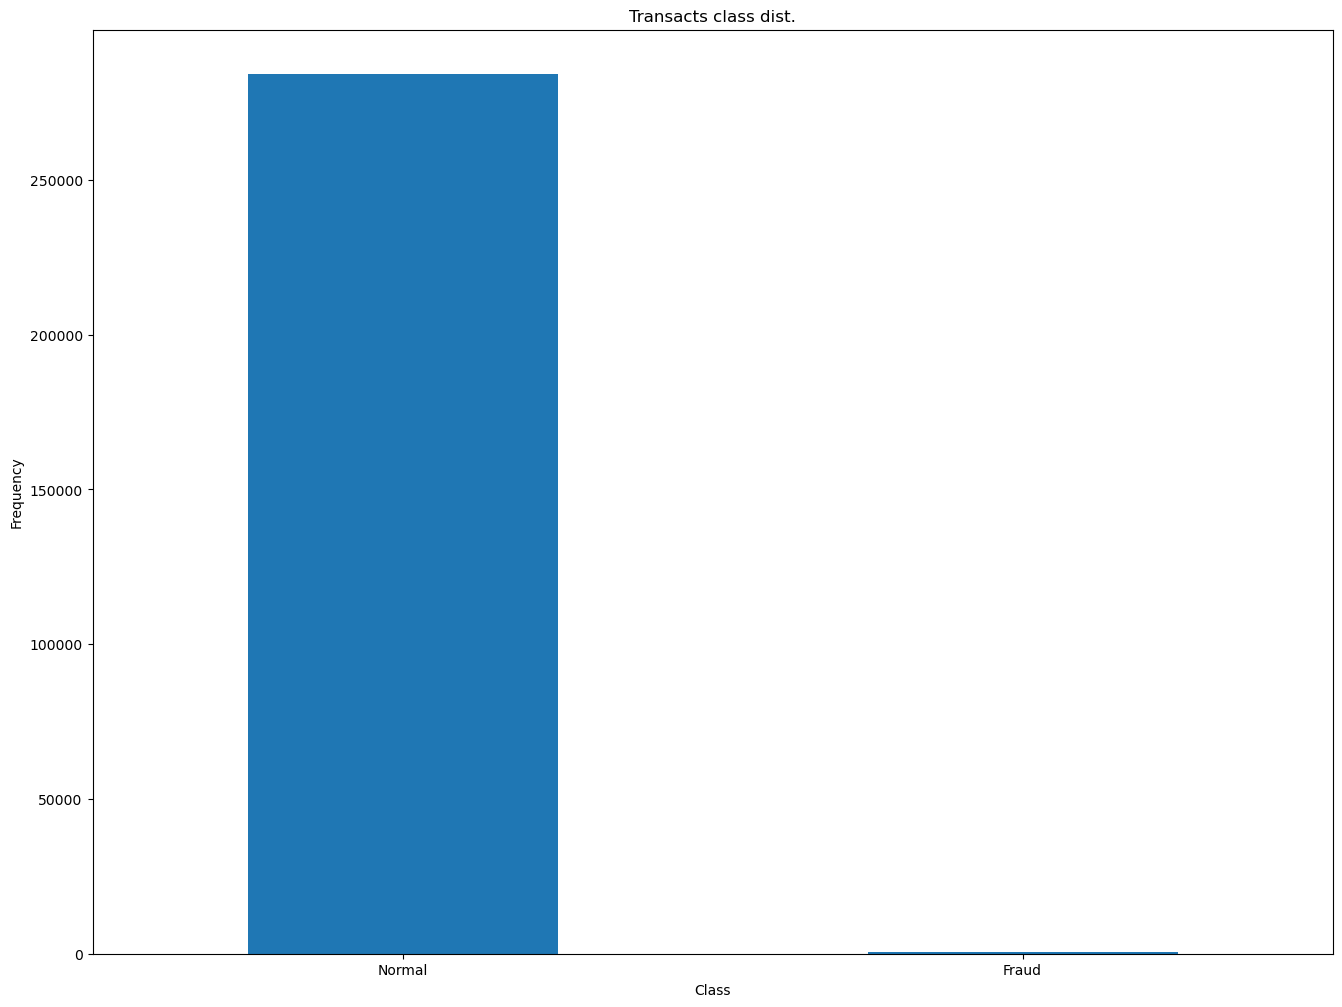

In [8]:
count_xlasses = pd.value_counts(cards_data['Class'], sort=True)
count_xlasses.plot(kind = 'bar', rot = 0)
plt.title("Transacts class dist.")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [9]:
fraud = cards_data[cards_data['Class']==1]
normal = cards_data[cards_data['Class']==0]

print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [10]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

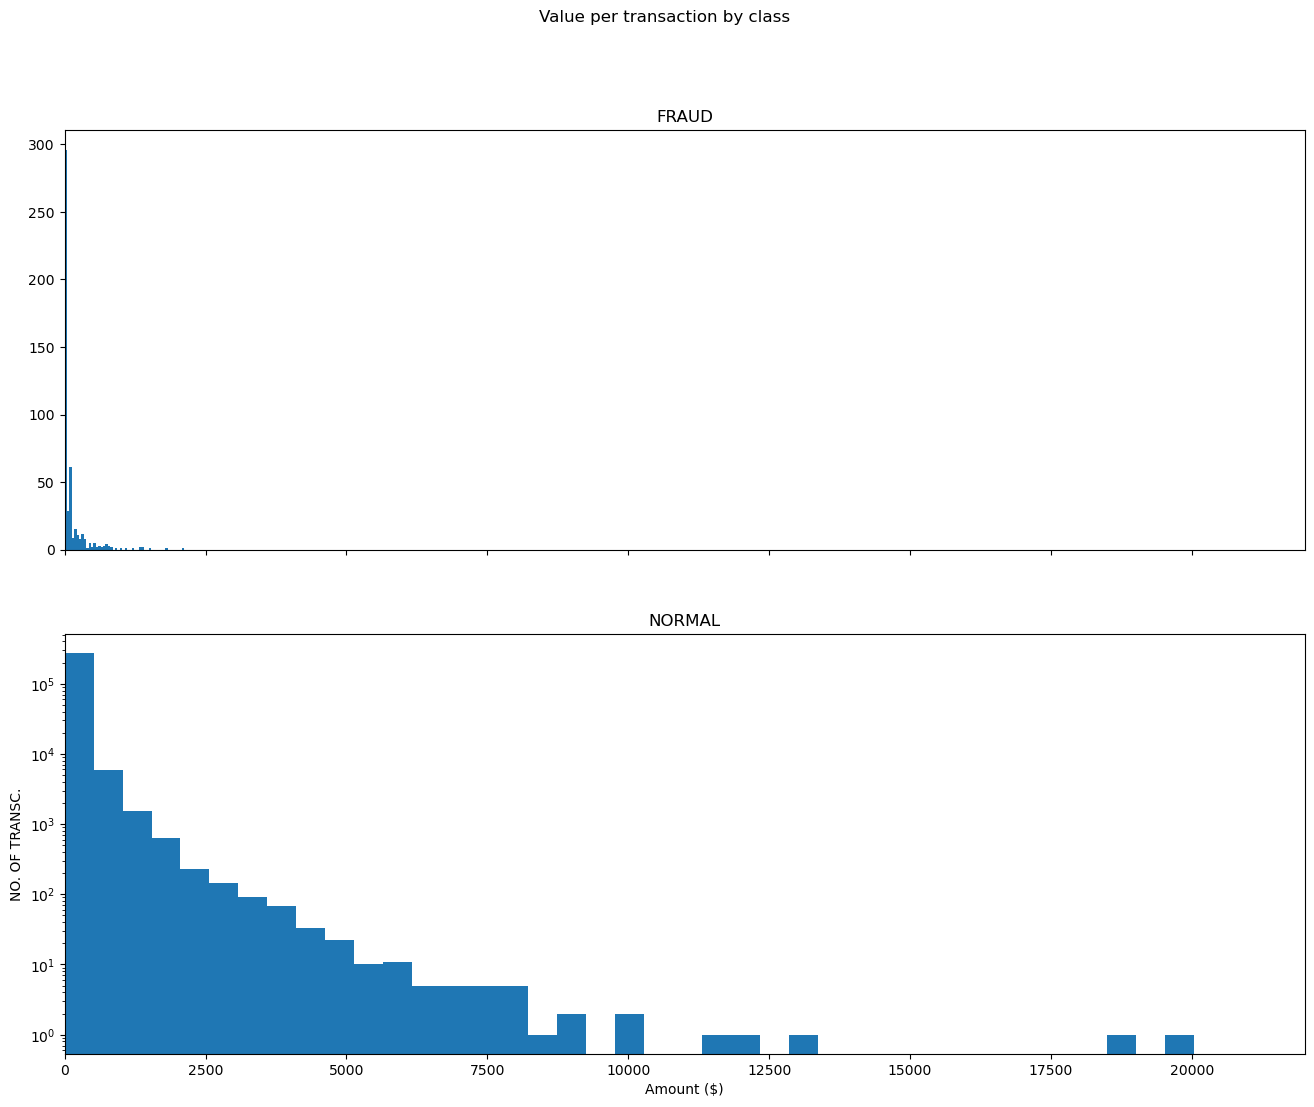

In [16]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Value per transaction by class")
bins = 50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('FRAUD')

ax2.hist(normal.Amount, bins=bins)
ax2.set_title('NORMAL')

plt.xlabel("Amount ($)")
plt.ylabel("NO. OF TRANSC.")

plt.xlim(0,22000)
plt.yscale('log')
plt.show()

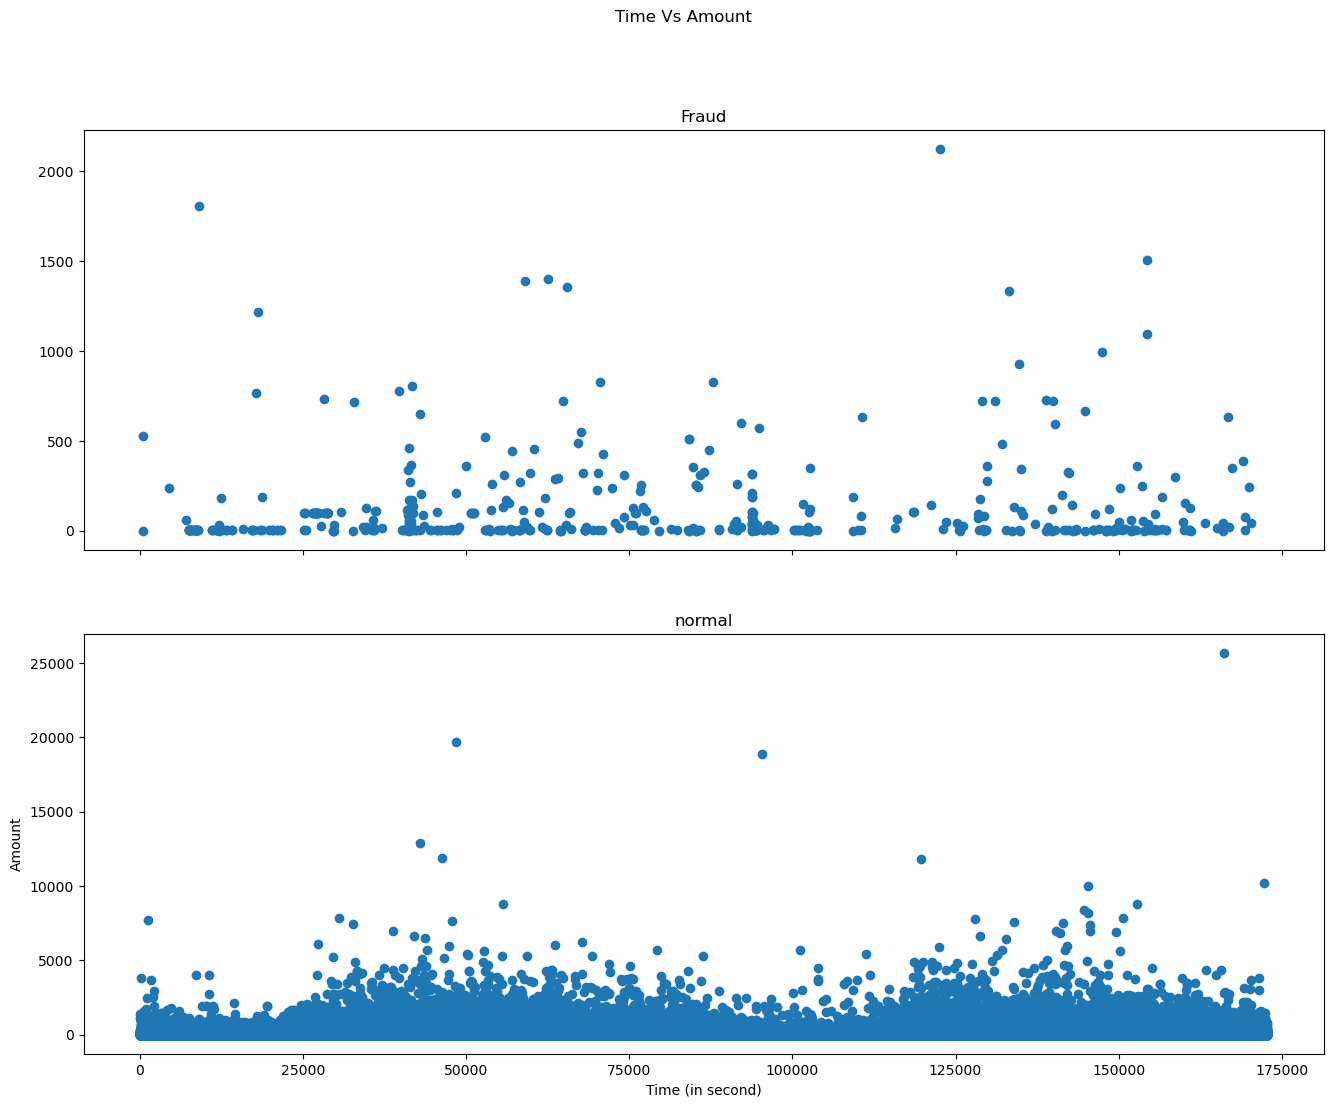

In [17]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Time Vs Amount")

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('normal')

plt.xlabel("Time (in second)")
plt.ylabel("Amount")

plt.show()

<AxesSubplot:xlabel='Time', ylabel='Density'>

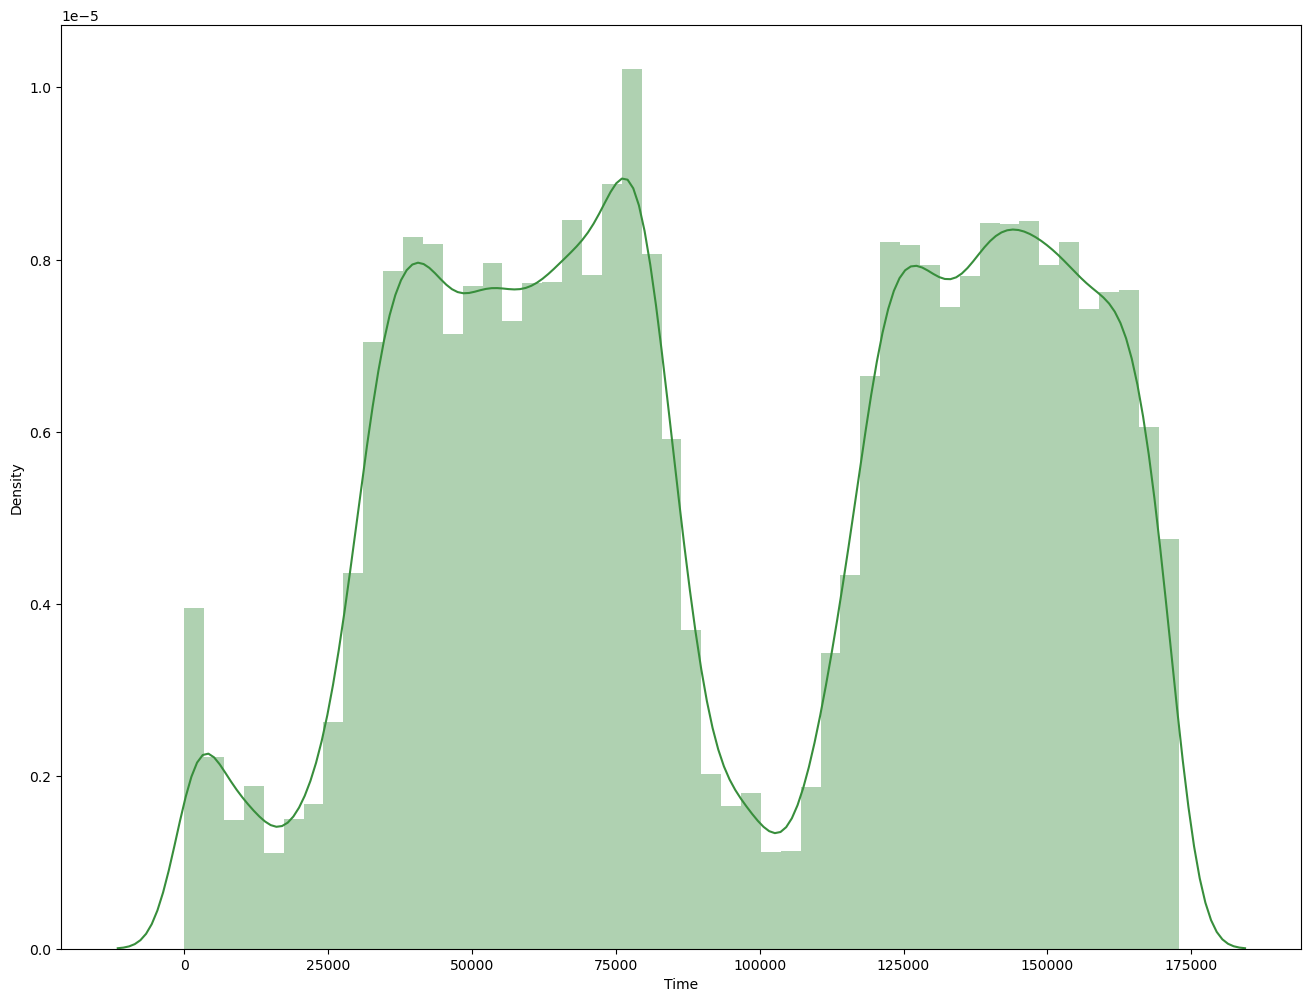

In [19]:
sns.distplot(cards_data['Time'],color='#388E3C')

In [20]:
fraud = cards_data[cards_data['Class']==1]
valid = cards_data[cards_data['Class']==0]

In [21]:
print(fraud.shape)
print(valid.shape)

(492, 31)
(284315, 31)


In [22]:
outlier_part = len(fraud)/float(len(valid))

outlier_part

0.0017304750013189597

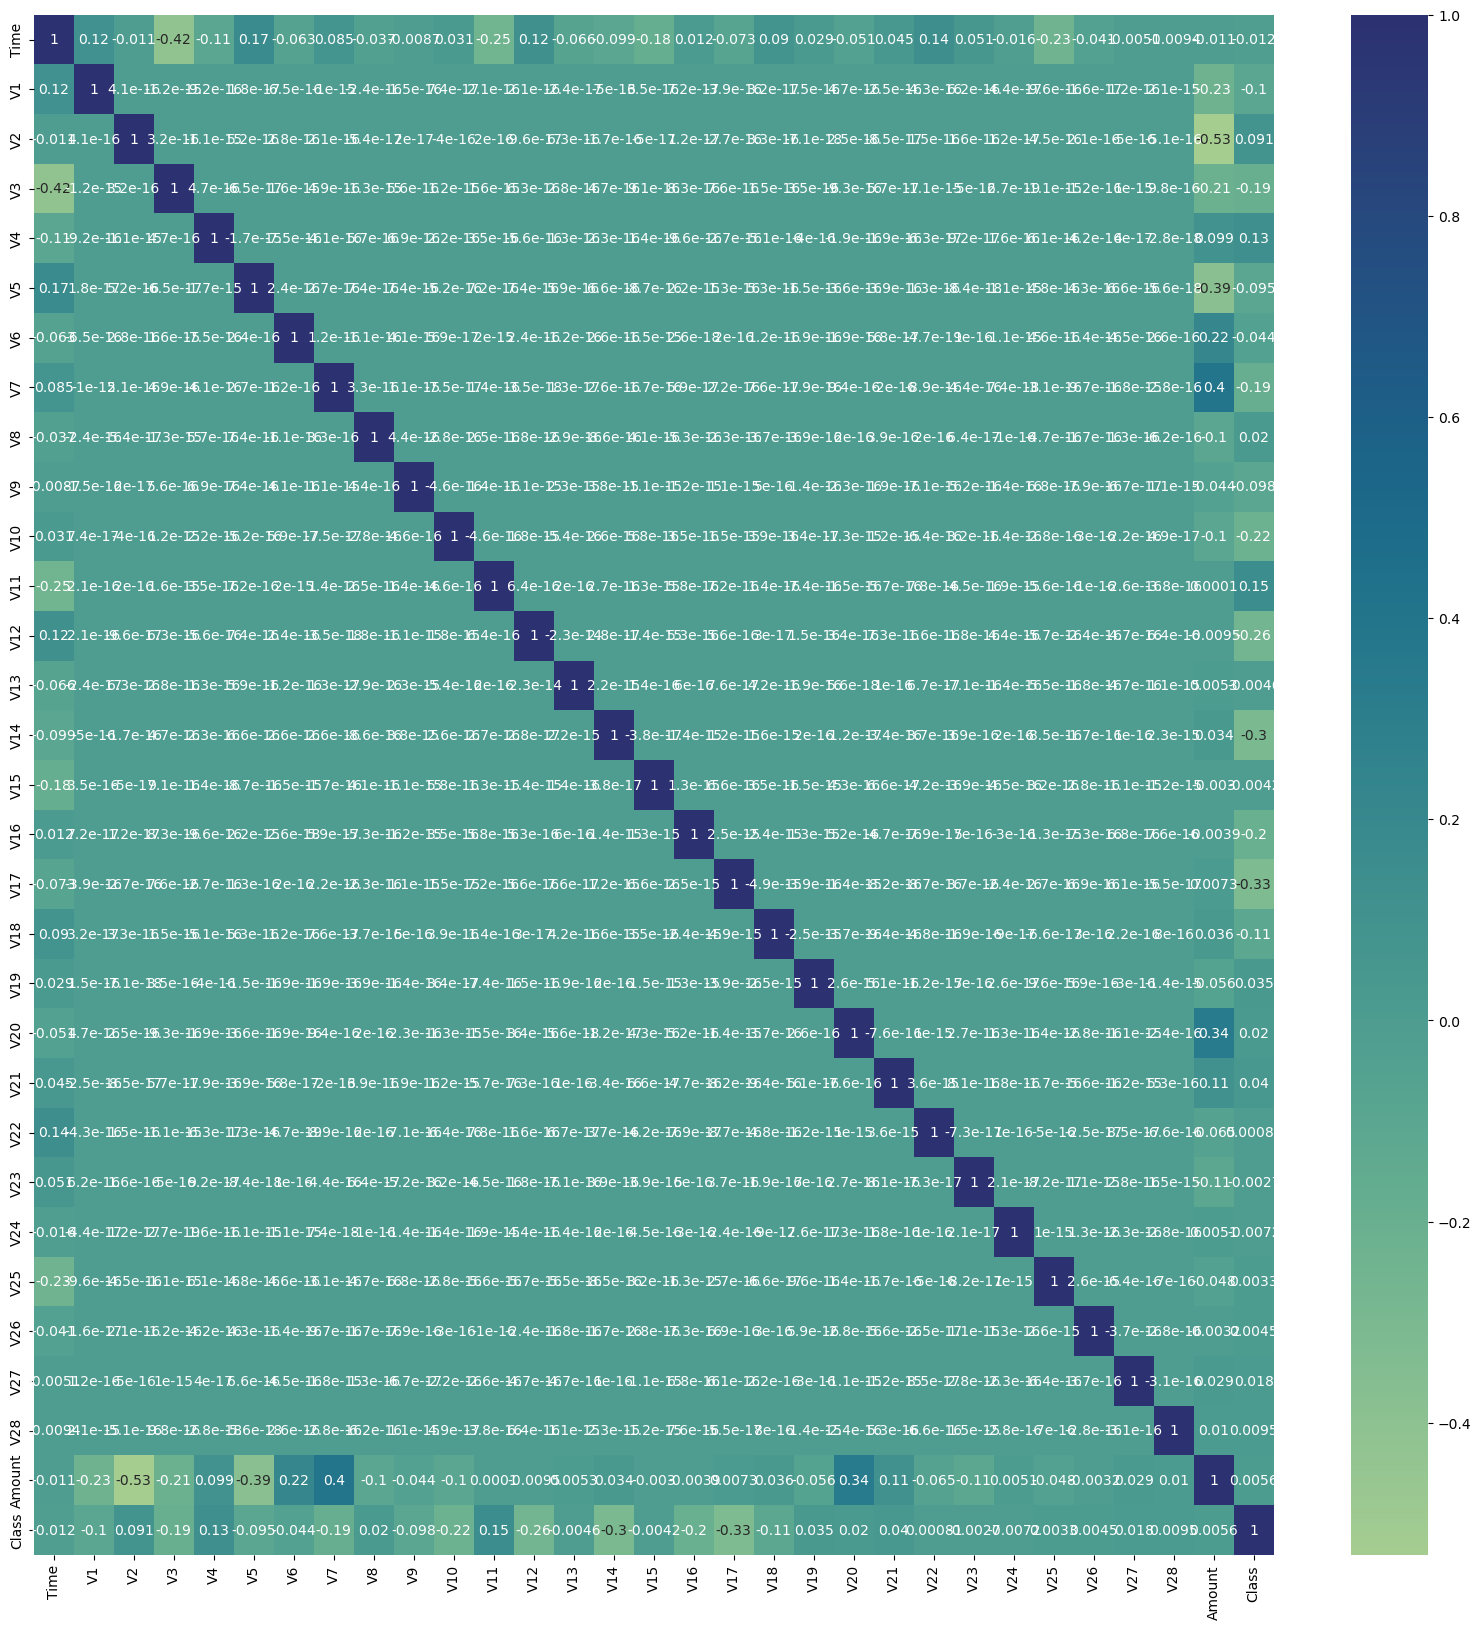

In [25]:
corrmat = cards_data.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(cards_data[top_corr_feature].corr(), annot=True, cmap='crest')

In [26]:
columns = cards_data.columns.tolist()
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [27]:
columns = [c for c in columns if c not in ["Class"]]
target = 'Class'

In [28]:
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [29]:
target

'Class'

In [30]:
columns = [c for c in columns if c not in ["Class"]]
target = 'Class'
state = np.random.RandomState(101)
x = cards_data[columns]
y = cards_data[target]
x_outlier = state.uniform(low=0, high=1, size=(x.shape[0], x.shape[1]))
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=90)

In [32]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
72680,54811.0,1.137428,0.072687,0.931640,1.994444,-0.627394,-0.047240,-0.336426,0.162181,0.126358,...,-0.261261,-0.105528,-0.145542,0.072389,0.438426,0.229735,0.996325,-0.051011,0.003601,0.00
175408,122322.0,0.004926,0.850256,0.017792,-0.048393,1.093626,-0.651530,1.006256,-0.287396,-0.356069,...,0.073513,0.292783,1.082098,-0.387755,-0.465039,-0.296539,-0.024927,0.036087,-0.023700,5.00
199153,132829.0,1.936249,-0.231908,-1.662721,-0.051401,0.907903,0.764113,-0.085125,0.200364,0.369935,...,-0.295740,0.339789,1.207421,-0.012206,-1.593540,0.106041,0.002772,0.024421,-0.084871,7.74
106438,69965.0,-0.297096,0.567109,1.504216,1.528546,-0.827522,0.826598,-0.467142,0.725764,0.725319,...,-0.100748,-0.005236,0.441471,0.291178,0.136673,-1.080246,-0.534802,0.186363,0.129654,35.61
48057,43475.0,-2.431756,0.298767,1.972218,-0.369188,-0.570644,0.965840,0.214847,0.723572,-0.655184,...,-0.477653,-0.310633,-0.577198,0.323206,-0.159969,-0.070132,2.689352,-0.301163,-0.007367,132.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223802,143530.0,-0.308167,1.591107,-1.373583,0.038114,0.037260,-1.002515,-0.659082,-2.430258,-0.279426,...,0.315747,-0.946215,1.263171,0.123609,-0.076179,-0.373384,-0.166019,-0.106544,-0.010175,1.50
158375,111144.0,0.027415,0.938860,-0.137347,-0.411764,1.018753,-0.009943,0.651933,0.005686,1.282204,...,-0.034821,0.200071,0.979758,-0.281001,0.024118,-0.393095,-0.451948,0.454234,0.267469,1.00
75075,55887.0,-1.562455,0.443862,1.011390,0.032803,0.550616,-0.491726,0.308602,0.161854,-0.125248,...,-0.243460,-0.335385,-0.472779,0.564785,-0.056079,-0.104507,0.103312,0.264616,0.082446,0.99
203423,134811.0,-2.415369,1.742191,0.578007,0.408996,-0.995119,1.858211,-0.445551,0.743951,0.661218,...,0.167682,-0.014133,0.300680,-0.310377,-0.327008,0.176959,0.001773,-1.369533,-0.601018,105.54


In [33]:
x_train.shape

(227845, 30)

In [34]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [35]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [37]:
print(classification_report(y_train, y_pred_train))

print("######"*50)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227443
           1       0.69      0.70      0.70       402

    accuracy                           1.00    227845
   macro avg       0.85      0.85      0.85    227845
weighted avg       1.00      1.00      1.00    227845

############################################################################################################################################################################################################################################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.66      0.70      0.68        90

    accuracy                           1.00     56962
   macro avg       0.83      0.85      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [38]:
print(confusion_matrix(y_train, y_pred_train))

print("######"*50)

print(confusion_matrix(y_test, y_pred_test))

[[227319    124]
 [   120    282]]
############################################################################################################################################################################################################################################################################################################
[[56840    32]
 [   27    63]]


In [39]:
print(accuracy_score(y_train, y_pred_train))

print("######"*50)

print(accuracy_score(y_test, y_pred_test))

0.998929096534925
############################################################################################################################################################################################################################################################################################################
0.9989642217618764


In [40]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
y_pred_dt_trian = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

In [43]:
print(accuracy_score(y_train, y_pred_dt_trian))

print("######"*50)

print(accuracy_score(y_test, y_pred_dt_test))

1.0
############################################################################################################################################################################################################################################################################################################
0.9990871107053826


In [44]:
print(confusion_matrix(y_train, y_pred_dt_trian))

print("######"*50)

print(confusion_matrix(y_test, y_pred_dt_test))

[[227443      0]
 [     0    402]]
############################################################################################################################################################################################################################################################################################################
[[56843    29]
 [   23    67]]


In [45]:
from sklearn import tree

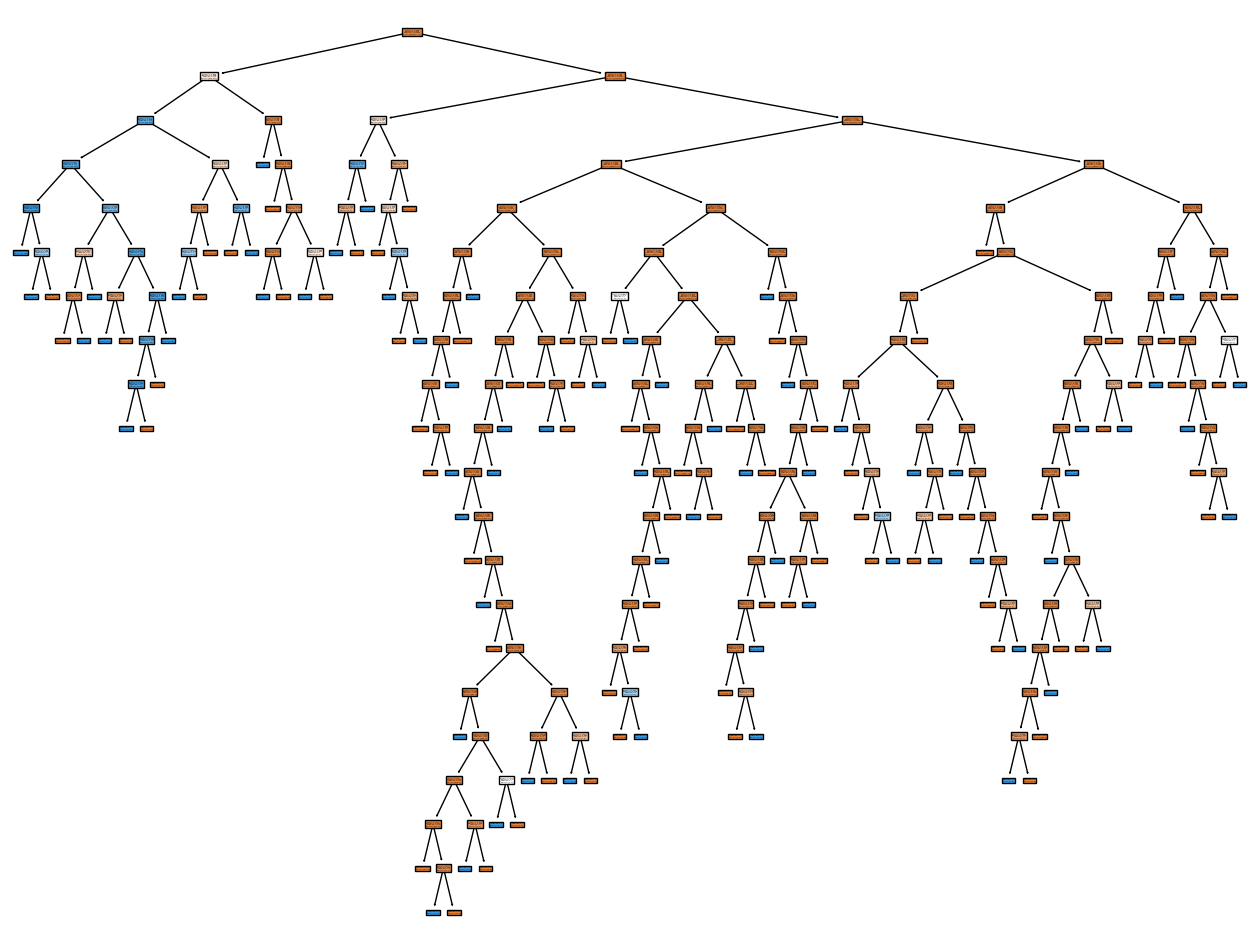

In [46]:
tree.plot_tree(dtree, filled=True)
plt.show()